## 2. Binary SVM Model

Since Kernel was interuppted by running question 3 and memory was getting full therefore I had to add the screenshots from my teammate's answer(Saras) to question 2

Visualize all seven training examples and sketch the decision boundary produced by the SVM classifier (again, this is from scikit-learn). Write down all relevant model settings chosen. There is no need for test/validation splitting for this.

In [ ]:
import numpy as np
X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,1],[4,3]])
y = np.array([1,1,1,1,0,0,0]) #replacing y with 1 and n with 0

![image.png](attachment:image.png)

In [ ]:
import pandas as pd
X_pd = pd.DataFrame(X,columns =['X1','X2'])
y_pd = pd.DataFrame(y,columns =['y'])
df_concat = pd.concat([X_pd, y_pd], axis=1)
df_concat

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt   
sns.lmplot('X1', 'X2', df_concat, hue='y', fit_reg=False)
fig = plt.gcf()
plt.show()

![image.png](attachment:image.png)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

Is the data linearly separable?
Yes the data is linearly separable

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='b', levels=[0], alpha=0.5,
           linestyles=['--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

![image.png](attachment:image.png)

Write down the equation for this decision boundary. Also, state the rule of classification between 'y' and 'n'. It should be of the form 'y' if , and 'n' otherwise.

In [ ]:
for (intercept, coef) in zip(clf.intercept_, clf.coef_):
    s = "y = {0:.3f}".format(intercept)
    for (i, c) in enumerate(coef):
        s += " + {0:.3f} * x{1}".format(c, i)

    print(s)

y = -0.846 + -0.615 * x0 + 1.077 * x1

Would a slight perturbation of the 6-th example affect the SVM solution? Justify your answer.

![image.png](attachment:image.png)

From the above image, assuming slight change in the value , the 6th element can vary within the red circle. As we can see , the decision boundary will not be affected because of this point as it is far away from the line so in theory we should not witness any change in the decision boundary even after slightly varying the values

In [ ]:
X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4.0,1.0],[4,3]])
y = np.array([1,1,1,1,0,0,0]) 
X1 = X.copy()
X2 = X.copy()
# assuming a slight perturbation of 0% i.e +-10% we subtract from the original values
X1[5] = [4.0*(1-0.1),1.0*(1-0.1)] # subtract 1 from both values
X2[5] = [4.0*(1+0.1),1.0*(1+0.1)] # add 1 to both the values

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
X_pd1= pd.DataFrame(X1,columns =['X1','X2'])
y_pd1 = pd.DataFrame(y,columns =['y'])
df_concat1 = pd.concat([X_pd1, y_pd1], axis=1)
df_concat1

from sklearn import svm
clf1 = svm.SVC(kernel='linear')
clf1.fit(X1, y)
plt.scatter(X1[:, 0], X1[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf1.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='b', levels=[0], alpha=0.5,
           linestyles=['--'])
# plot support vectors
ax.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show() 
for (intercept, coef) in zip(clf1.intercept_, clf1.coef_):
    s = "y = {0:.3f}".format(intercept)
    for (i, c) in enumerate(coef):
        s += " + {0:.3f} * x{1}".format(c, i)

    print(s)

![image-4.png](attachment:image-4.png)

In [ ]:
# Second Scenario
X_pd2 = pd.DataFrame(X2,columns =['X1','X2'])
y_pd2 = pd.DataFrame(y,columns =['y'])
df_concat2 = pd.concat([X_pd2, y_pd2], axis=1)

clf2 = svm.SVC(kernel='linear')
clf2.fit(X2, y)

plt.scatter(X2[:, 0], X2[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf2.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5,
           linestyles=['--'])
# plot support vectors
ax.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

for (intercept, coef) in zip(clf2.intercept_, clf2.coef_):
    s = "y = {0:.3f}".format(intercept)
    for (i, c) in enumerate(coef):
        s += " + {0:.3f} * x{1}".format(c, i)

    print(s)

![image.png](attachment:image.png)

From the above result we verify that there will be no change in the decision boundaries even after slight perturbation of the 6th element in our dataset

## 3. Multiclass Support Vector Machine

In [ ]:
import os,sys
import pandas as pd
from collections import Counter
from scipy.sparse import csr_matrix 
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import matplotlib.pyplot as plt
import math
import pickle
#from sklearnex import patch_sklearn 
#patch_sklearn()

In [ ]:
os.getcwd()


'C:\\Users\\schaud46'

In [ ]:
os.chdir(r'C:\Users\schaud46\Downloads\data')

In [ ]:
#Train data

train_data = open("articles.train", 'r')
traindata=f.readlines()
train_data.close()

In [ ]:
#Test data

test_data=open("articles.test", 'r')
testdata=F.readlines()
test_data.close

<function TextIOWrapper.close()>

In [ ]:
#Word map data 

words=open("words.map", 'r')
word=w.readlines()
words.close()

In [ ]:
# Replacing \n at the end of each line with nothing. 

words=[i.replace('\n','') for i in word]

1. Load the training and test data into pandas data frames. Justify your dataframe schema choices.

In [ ]:
#Defined function for converting the original data into array. 

def matrix_form(data,words):
  labels = []
  rows = []
  cols = []
  freq = []
  r=-1

  for line in data:
    r=r+1
    line=line.replace('\n','')
    line=line.split(' ')
    labels.append(int(line[0]))
    
    for x in line[1:]:
      col,val=x.split(':')
      rows.append(r)
      cols.append(int(col))
      freq.append(int(val))
      
  return csr_matrix((freq,(rows,cols)),shape=(len(data),len(words))).toarray(),labels

In [ ]:
train_df , y_train =matrix_form(traindata,words)

In [ ]:
#Converting array to dataframe 

train_ = pd.DataFrame(train_df)
train_['y_train']=y_train 

In [ ]:
# set([int(c[1].replace('\n','')) for c in [b.split(':') for b in a[0].split(' ')][1:]])

In [ ]:
# set(train_.loc[0])

In [ ]:
test_df , y_test = matrix_form(testdata,words)

In [ ]:
test_ = pd.DataFrame(test_df)
test_['y_test']=y_test

2. First, train four different (hard-margin) linear classifiers. As SVM classifies only binary labels, you have to replace the target class number to 1 and all others to -1 before calling the library function. For instance, if you try to classify whether or not politics, you are to use 1,000 articles about politics as positive samples and 3,000 others as negative samples for training. Once you learn the four classifiers, the output label of each test example x is determined by the following formula:

h w,b(x) = argmaxk∈{1,2,3,4} (w(k).T x + b(k))

where w(k) is the learned weight vector, and b(k) is the biased term for the class k. If the prediction hw,b(x) is different from the ground-truth class, it yields an error. Report the training and test errors of four classifiers, respectively.

In [ ]:
def model_train(data1,data2,i):
  
  model_ = svm.SVC(kernel='linear', C=1e7)
  data1=train_.drop('y_train',axis=1)
  labels1=train_['y_train']
  data2=test_.drop('y_test',axis=1)
  labels2=test_['y_test']
  labels1=pd.Series(labels1).apply(lambda x: 1 if x == i else -1)
  model_.fit(data1, labels1)
  y_pred = model_.predict(data2)
  labels2=pd.Series(labels2).apply(lambda x: 1 if x == i else -1)
  return metrics.accuracy_score(labels2,y_pred),model_

In [ ]:
def save_file(file_name, file_obj):
    f=open(file_name,'wb')
    pickle.dump(file_obj,f)
    f.close()
    
def load_file(file_name):
    g=open(file_name,'rb')
    h_=pickle.load(g)
    g.close()
    return h_

In [ ]:
#Weights, intercepts and accuracies for 4 models. 

w_partb=[]  #Weights 
i_partb=[]  #Intercepts
errors_partb=[]
for i in [1,2,3,4]:
    Accuracy,model_ = model_train(train_,test_,i)
    w_partb.append(model_.coef_)
    i_partb.append(model_.intercept_)
    errors_partb.append(1-Accuracy)
    print(f"\n Error for Model {i}",1 - Accuracy)




 Error for Model 1 0.04208333333333336

 Error for Model 2 0.0658333333333333

 Error for Model 3 0.050833333333333286

 Error for Model 4 0.0591666666666667


In [ ]:
#Calculating the h values - using formula - appending all the values from 4 models in a list. - Only for train data

h_val_train=[]

for i in range(4):
    w=w_partb[i]
    b=i_partb[i]
    h=np.dot(w,train_.drop('y_train',axis=1).T)+b
    h_val_train.append(h)

In [ ]:
#Reshaping to a single array.

reshaped_h_train=np.array(h_val_train).reshape(4,4000)

In [ ]:
#Getting the max value for every row.

argmax_val_train=np.argmax(reshaped_h_train,axis=0)

In [ ]:
#Accuracy with train data. 

print(metrics.accuracy_score(train_['y_train'],(argmax_val_train+1))


1.0

In [ ]:
#Calculating the h values - using formula - appending all the values from 4 models in a list. - for test data 

h_val_test=[]

for i in range(4):
    w=w_partb[i]
    b=i_partb[i]
    h=np.dot(w,test_.drop('y_test',axis=1).T)+b
    h_val_test.append(h)

In [ ]:
#Reshaping the list and getting the max value for test data. 

reshaped_h_test=np.array(h_val_test).reshape(4,2400)
argmax_val_test=np.argmax(reshaped_h_test,axis=0)

In [ ]:
#Checking the accuracy with test data.

acc_=metrics.accuracy_score(test_['y_test'],argmax_val_test+1)
print("Error after training weights", 1 - acc_ )

Error after training weights 0.0970833333333333


3. Now you are to train soft-margin linear classifiers with different C values from {0.125, 0.25, 0.5, 1, 2, 4, 8, ... , 256, 512}.Plot a graph showing both training and validation errors together with varying C in log-scale. (i.e., x-axis: log2 C, y-axis: error rate) What are the best C value for multiclass classification? (Note: You should apply one uniform C value identically to all four soft-margin classifiers) In order to pick the best C value, you are required to perform a hold-out validation:
a. Split the entire training data randomly into 75% for training and 25% for validation.
b. For each C value, learn four binary classifiers similar to part (a) but only on the training data.
c. Measure the overall classification error on the validation data.
d. Pick the C with the lowest validation error.

In [ ]:
train_sm=pd.DataFrame(train_)
test_sm=pd.DataFrame(test_)

In [ ]:
#Function for soft margin svm on training and validation data

def soft_margin(train_df,i,c_value):
    
    labels1=pd.Series(train_df['y_train']).apply(lambda x: 1 if x == i else -1)
    traindata=train_df.drop('y_train',axis=1)
    X_train,X_test,y_train,y_test = train_test_split(traindata, labels1, test_size=0.25, random_state=190) 
    model_1 = svm.SVC(kernel='linear', C=c_value)
     
    model_1.fit(X_train, y_train)
    y_pred_train = model_1.predict(X_train)
    y_pred_val = model_1.predict(X_test)

    return metrics.accuracy_score(y_train,y_pred_train), metrics.accuracy_score(y_test,y_pred_val),model_1

In [ ]:
#C-values to train the data 

c_values =[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
train_errors_1 =[]
val_errors_1 = []

#For each C value, learn four binary classifiers for only training data
#For Model type where class 1 == 1, other classes are -1. 

for j in c_values:
    Train_Acc_c_val,Val_Acc_c_val,model_1 = soft_margin(train_sm,1,j) 
    train_errors_1.append(1-Train_Acc_c_val)
    val_errors_1.append(1-Val_Acc_c_val)
        


In [ ]:
print(train_errors_1) 
print(val_errors_1) 

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.026000000000000023, 0.027000000000000024, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026]


In [ ]:
c_values =[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
train_errors_2 =[]
val_errors_2 = []

#For each C value, learn four binary classifiers for only training data
#For Model type where class 2 == 1, other classes are -1. 

for j in c_values:
    print(f"model {j}")
    Train_Acc_c_val,Val_Acc_c_val,model_1 = soft_margin(train_sm,2,j) 
    train_errors_2.append(1-Train_Acc_c_val)
    val_errors_2.append(1-Val_Acc_c_val)

model 0.125
model 0.25
model 0.5
model 1
model 2
model 4
model 8
model 16
model 32
model 64
model 128
model 256
model 512


In [ ]:
print(train_errors_2) 
print(val_errors_2) 

[0.0006666666666667043, 0.0006666666666667043, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.05500000000000005, 0.05600000000000005, 0.05700000000000005, 0.05800000000000005, 0.061000000000000054, 0.061000000000000054, 0.061000000000000054, 0.061000000000000054, 0.061000000000000054, 0.061000000000000054, 0.061000000000000054, 0.061000000000000054, 0.061000000000000054]


In [ ]:
c_values =[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
train_errors_3 =[]
val_errors_3 = []

#For each C value, learn four binary classifiers for only training data
#For Model type where class 3 == 1, other classes are -1. 

for j in c_values:
    
    Train_Acc_c_val,Val_Acc_c_val,model_1 = soft_margin(train_sm,3,j) 
    train_errors_3.append(1-Train_Acc_c_val)
    val_errors_3.append(1-Val_Acc_c_val)
    print(f"model {j}")

model 0.125
model 0.25
model 0.5
model 1
model 2
model 4
model 8
model 16
model 32
model 64
model 128
model 256
model 512


In [ ]:
print(train_errors_3) 
print(val_errors_3)

[0.0003333333333332966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.038000000000000034, 0.041000000000000036, 0.041000000000000036, 0.04200000000000004, 0.04200000000000004, 0.04200000000000004, 0.04200000000000004, 0.04200000000000004, 0.04200000000000004, 0.04200000000000004, 0.04200000000000004, 0.04200000000000004, 0.04200000000000004]


In [ ]:
c_values =[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
train_errors_4 =[]
val_errors_4 = []

#For each C value, learn four binary classifiers for only training data
#For Model type where class 4 == 1, other classes are -1. 

for j in c_values:
   
    Train_Acc_c_val,Val_Acc_c_val,model_1 = soft_margin(train_sm,4,j) 
    train_errors_4.append(1-Train_Acc_c_val)
    val_errors_4.append(1-Val_Acc_c_val)
    print(f"model {j}")

model 0.125
model 0.25
model 0.5
model 1
model 2
model 4
model 8
model 16
model 32
model 64
model 128
model 256
model 512


In [ ]:
print(train_errors_4) 
print(val_errors_4)

[0.0003333333333332966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.030000000000000027, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026, 0.029000000000000026]


In [ ]:
#To choose the best C-value
c_values =[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
val_errors_1 = [0.06699999999999995, 0.02300000000000002, 0.030000000000000027, 0.06899999999999995, 0.030000000000000027, 0.08099999999999996, 0.030000000000000027, 0.030000000000000027, 0.06899999999999995, 0.06899999999999995, 0.030000000000000027, 0.030000000000000027, 0.07099999999999995]
val_errors_2 = [0.051000000000000045, 0.10099999999999998, 0.05300000000000005, 0.09199999999999997, 0.14, 0.061000000000000054, 0.061000000000000054, 0.14, 0.061000000000000054, 0.061000000000000054, 0.061000000000000054, 0.061000000000000054, 0.15800000000000003]
val_errors_3 = [0.025000000000000022, 0.026000000000000023, 0.06299999999999994, 0.07499999999999996, 0.03300000000000003, 0.06699999999999995, 0.03300000000000003, 0.06999999999999995, 0.03300000000000003, 0.06999999999999995, 0.122, 0.06999999999999995, 0.03300000000000003]
val_errors_4 = [0.038000000000000034, 0.03700000000000003, 0.06599999999999995, 0.06799999999999995, 0.11499999999999999, 0.06599999999999995, 0.03700000000000003, 0.07099999999999995, 0.03700000000000003, 0.03700000000000003, 0.07399999999999995, 0.03700000000000003, 0.03700000000000003]

avg_=[]

for a,b,c,d in zip(val_errors_1,val_errors_2,val_errors_3,val_errors_4):
    x=(a+b+c+d)/4
    avg_.append(x)


In [ ]:
dict_leastval=sorted(list(zip(c_values,avg_)),key=lambda x: x[1])

The best value of C is 0.125.

In [ ]:
logCValues = []
for c in c_values:
    logC = math.log(c,2)
    logCValues.append(logC)

In [ ]:
logCValues

[-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

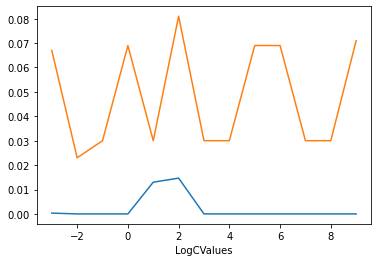

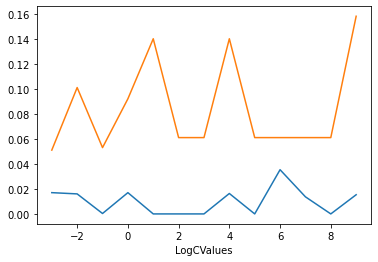

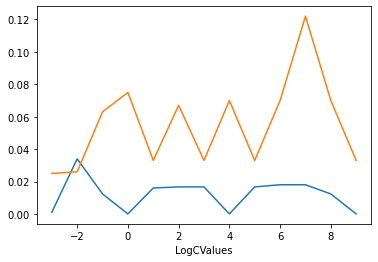

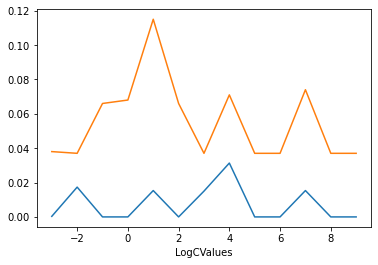

In [ ]:
#Graphs for train and validation errors with log C_values

import matplotlib.pyplot as plt
train_errors_1 = [0.0003333333333332966, 0.0, 0.0, 0.0, 0.013000000000000012, 0.014666666666666717, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
train_errors_2 = [0.017000000000000015, 0.016000000000000014, 0.0003333333333332966, 0.017000000000000015, 0.0, 0.0, 0.0, 0.01633333333333331, 0.0, 0.03533333333333333, 0.013666666666666716, 0.0, 0.01533333333333331]
train_errors_3 = [0.0010000000000000009, 0.03400000000000003, 0.012333333333333307, 0.0, 0.016000000000000014, 0.01666666666666672, 0.01666666666666672, 0.0, 0.01666666666666672, 0.018000000000000016, 0.018000000000000016, 0.012333333333333307, 0.0]
train_errors_4 = [0.0003333333333332966, 0.01733333333333331, 0.0, 0.0, 0.01533333333333331, 0.0, 0.015000000000000013, 0.031333333333333324, 0.0, 0.0, 0.01533333333333331, 0.0, 0.0]


plt. plot(logCValues, train_errors_1, label = "line 1")
plt. plot(logCValues, val_errors_1, label = "line 2")
plt. xlabel('LogCValues')
plt.show()

plt. plot(logCValues, train_errors_2, label = "line 1")
plt. plot(logCValues, val_errors_2, label = "line 2")
plt. xlabel('LogCValues')
plt.show()

plt. plot(logCValues, train_errors_3, label = "line 1")
plt. plot(logCValues, val_errors_3, label = "line 2")
plt. xlabel('LogCValues')
plt.show()

plt. plot(logCValues, train_errors_4, label = "line 1")
plt. plot(logCValues, val_errors_4, label = "line 2")
plt. xlabel('LogCValues')
plt.show()

# ax.plot(logCValues, train_errors_1)
# ax.plot(logCValues, val_errors_1)
# plt.show()

4. With the best C value chosen from part (b), learn four soft-margin classifiers again on the entire training set. (Note that your classifiers from part (b) used only 75% of the training set for learning, holding out 25% for validation) Test your newly learned best classifiers on the test set similar to part (a) where the output label is determined by the argmax class given in the formula in part (a). Compare the test error rates to hard-margin classifiers on part (a). Which classifier works better? Justify your observation.

In [ ]:
#Best value was found to be 0.25

def model_train_partd(data1,data2,i):
  
  model_11 = svm.SVC(kernel='linear', C=0.125)
  data1=train_.drop('y_train',axis=1)
  labels1=train_['y_train']
  data2=test_.drop('y_test',axis=1)
  labels2=test_['y_test']
  labels1=pd.Series(labels1).apply(lambda x: 1 if x == i else -1)
  model_11.fit(data1, labels1)
  y_pred = model_11.predict(data2)
  labels2=pd.Series(labels2).apply(lambda x: 1 if x == i else -1)
  return metrics.accuracy_score(labels2,y_pred),model_11

In [ ]:
w_partd=[]  #Weights 
i_partd=[]  #Intercepts
errors_partd=[]
for i in [1,2,3,4]:
    Acc_partd,model_11 = model_train_partd(train_,test_,i)
    w_partd.append(model_11.coef_)
    i_partd.append(model_11.intercept_)
    errors_partd.append(1-Acc_partd)
    print(f"\n Error for Model {i}",1 - Acc_partd)


 Error for Model 1 0.03833333333333333

 Error for Model 2 0.053749999999999964

 Error for Model 3 0.0345833333333333

 Error for Model 4 0.05833333333333335


In [ ]:
#Accuracy
h_val_train_partd=[]

for i in range(4):
    w=w_partd[i]
    b=i_partd[i]
    h=np.dot(w,train_.drop('y_train',axis=1).T)+b
    h_val_train_partd.append(h)

reshaped_h_train_partd=np.array(h_val_train_partd).reshape(4,4000)
argmax_val_train_partd=np.argmax(reshaped_h_train_partd,axis=0)
print(metrics.accuracy_score(train_['y_train'],argmax_val_train_partd+1))

0.99975

In [ ]:
h_val_test_partd=[]

for i in range(4):
    w=w_partd[i]
    b=i_partd[i]
    h=np.dot(w,test_.drop('y_test',axis=1).T)+b
    h_val_test_partd.append(h)
    
reshaped_h_test_partd=np.array(h_val_test_partd).reshape(4,2400)
argmax_val_test_partd=np.argmax(reshaped_h_test_partd,axis=0)
acc_1=metrics.accuracy_score(test_['y_test'],argmax_val_test_partd+1)
print("Error after training weights and selecting best C value", 1 - acc_1 )

Error after training weights and selecting best C value 0.08125000000000004


In [ ]:

Diff_hm_sm=acc_-acc_1

Diff_hm_sm

-0.015833333333333255

The accuracy for Classifier with Soft margin works better. Error with Hard Margin was 0.0970833333333333 and with soft margin it is 0.08125000000000004.
When the data set is linearly separable, we do not want to have misclassification, so it is better to use Soft Margin SVM because Hard Margin SVM is sensitive to outliers. 

5. For this problem, you will normalize feature vectors so that the feature vectors of each example have unit length. For each example x = (x1, x2, ..., xn), divide every component into kxk2 so that kxk2 = 1. Repeat the part (b) with normalized features and measure the test error rates again with newly picked C value. Compare the new test error to previous test error from soft-margin classifier without normalization, and explain why normalization makes a difference.

In [ ]:
train_norm = np.linalg.norm(train_.drop('y_train',axis=1), axis = 1)


In [ ]:
train_normalized = train_.drop('y_train',axis=1)/train_norm[:,None]

In [ ]:
test_norm=np.linalg.norm(test_.drop('y_test',axis=1), axis = 1)
test_normalized = test_.drop('y_test',axis=1)/test_norm[:,None]

In [ ]:
#Adding y_train to normalized dataframe
train_normalized = pd.DataFrame(train_normalized)
train_normalized['y_train']=y_train 

In [ ]:
test_normalized = pd.DataFrame(test_normalized)
test_normalized['y_test']=y_test 

In [ ]:
train_parte=pd.DataFrame(train_normalized)
test_parte=pd.DataFrame(test_normalized)

In [ ]:
#C-values to train the normalized data 

c_values =[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
train_norm_errors_1 =[]
val_norm_errors_1 = []

#For each C value, learn four binary classifiers for only training data
#For Model type where class 1 == 1, other classes are -1. 

for j in c_values:
    Train_Acc_c_val,Val_Acc_c_val,model_1 = soft_margin(train_normalized,1,j) 
    train_norm_errors_1.append(1-Train_Acc_c_val)
    val_norm_errors_1.append(1-Val_Acc_c_val)
        

In [ ]:
print('Parte_model1',train_norm_errors_1)
print('Parte_model1_val',val_norm_errors_1)

Parte_model1 [0.07433333333333336, 0.030000000000000027, 0.013000000000000012, 0.005333333333333301, 0.0016666666666667052, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Parte_model1_val [0.09699999999999998, 0.04200000000000004, 0.026000000000000023, 0.020000000000000018, 0.01200000000000001, 0.01200000000000001, 0.01200000000000001, 0.01200000000000001, 0.01200000000000001, 0.01200000000000001, 0.01200000000000001, 0.01200000000000001, 0.01200000000000001]


In [ ]:
c_values =[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
train_norm_errors_2 =[]
val_norm_errors_2 = []

#For each C value, learn four binary classifiers for only training data
#For Model type where class 1 == 2, other classes are -1. 

for j in c_values:
    Train_Acc_c_val,Val_Acc_c_val,model_1 = soft_margin(train_normalized,2,j) 
    train_norm_errors_2.append(1-Train_Acc_c_val)
    val_norm_errors_2.append(1-Val_Acc_c_val)

In [ ]:
print('Parte_model2',train_norm_errors_2)
print('Parte_model2_val',val_norm_errors_2)

Parte_model2 [0.21833333333333338, 0.08899999999999997, 0.03500000000000003, 0.01866666666666672, 0.004666666666666708, 0.0013333333333332975, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Parte_model2_val [0.244, 0.131, 0.07599999999999996, 0.04800000000000004, 0.03400000000000003, 0.03200000000000003, 0.03300000000000003, 0.03300000000000003, 0.03300000000000003, 0.03300000000000003, 0.03300000000000003, 0.03300000000000003, 0.03300000000000003]


In [ ]:
c_values =[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
train_norm_errors_3 =[]
val_norm_errors_3 = []

#For each C value, learn four binary classifiers for only training data
#For Model type where class 1 == 3, other classes are -1. 

for j in c_values:
    Train_Acc_c_val,Val_Acc_c_val,model_1 = soft_margin(train_normalized,3,j) 
    train_norm_errors_3.append(1-Train_Acc_c_val)
    val_norm_errors_3.append(1-Val_Acc_c_val)

In [ ]:
print('Parte_model3',train_norm_errors_3)
print('Parte_model3_val',val_norm_errors_3)

In [ ]:
c_values =[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
train_norm_errors_4 =[]
val_norm_errors_4 = []

#For each C value, learn four binary classifiers for only training data
#For Model type where class 1 == 4, other classes are -1. 

for j in c_values:
    Train_Acc_c_val,Val_Acc_c_val,model_1 = soft_margin(train_normalized,4,j) 
    train_norm_errors_4.append(1-Train_Acc_c_val)
    val_norm_errors_4.append(1-Val_Acc_c_val)

In [ ]:
print('Parte_model4',train_norm_errors_4)
print('Parte_model4_val',val_norm_errors_4)

In [ ]:
#Selecting best c value for normalized data 

c_values =[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

avg_norm=[]

for a,b,c,d in zip(val_norm_errors_1,val_norm_errors_2,val_norm_errors_3,val_norm_errors_4):
    x=(a+b+c+d)/4
    avg_norm.append(x)

dict_leastval_norm=sorted(list(zip(c_values,avg_norm)),key=lambda x: x[1])

In [ ]:
dict_leastval_norm

In [ ]:
def model_train_parte(data1,data2,i):
  
  model_11 = svm.SVC(kernel='linear', C=8)
  data1=data1.drop('y_train',axis=1)
  labels1=train_['y_train']
  data2=data2.drop('y_test',axis=1)
  labels2=test_['y_test']
  labels1=pd.Series(labels1).apply(lambda x: 1 if x == i else -1)
  model_11.fit(data1, labels1)
  y_pred = model_11.predict(data2)
  labels2=pd.Series(labels2).apply(lambda x: 1 if x == i else -1)
  return metrics.accuracy_score(labels2,y_pred),model_11

In [ ]:
w_parte=[]  #Weights 
i_parte=[]  #Intercepts
errors_parte=[]
for i in [1,2,3,4]:
    Accuracy,model_11 = model_train_parte(train_normalized,test_normalized,i)
    w_parte.append(model_11.coef_)
    i_parte.append(model_11.intercept_)
    errors_parte.append(1-Accuracy)
    print(f"\n Error for Model {i}",1 - Accuracy)

In [ ]:
h_val_train_parte=[]

for i in range(4):
    w=w_parte[i]
    b=i_parte[i]
    h=np.dot(w,train_normalized.drop('y_train',axis=1).T)+b
    h_val_train_parte.append(h)

reshaped_h_train_parte=np.array(h_val_train_parte).reshape(4,4000)
argmax_val_train_parte=np.argmax(reshaped_h_train_parte,axis=0)
metrics.accuracy_score(train_['y_train'],argmax_val_train_parte+1)

In [ ]:
h_val_test_parte=[]

for i in range(4):
    w=w_parte[i]
    b=i_parte[i]
    h=np.dot(w,test_normalized.drop('y_test',axis=1).T)+b
    h_val_test_parte.append(h)
    
reshaped_h_test_parte=np.array(h_val_test_parte).reshape(4,2400)
argmax_val_test_parte=np.argmax(reshaped_h_test_parte,axis=0)
acc_1=metrics.accuracy_score(test_['y_test'],argmax_val_test_parte+1)
print("Error after normalizing data, training weights and selecting best C value", 1 - acc_1 )

Error after normalizing data, training weights and selecting best C value is 0.055. Which is better when compared to Hard margin and soft margin model which was built using original data. 

6. What you have done so far is one way to extend binary SVM to a multiclass classifier, which is called 1-vs-all. There is another way of called 1-vs-1, where you are supposed to train all 4C2 binary classifiers distinguishing between every pair of classes. Then for each test example, you will pick the (not necessarily unique) class that achieves the highest votes.
Formally speaking, suppose that the binary classifier hij is trained by taking the examples from class i as positives and the examples from class j as negatives. 2 Then for each test example x, add one vote to class i if hij says x is in class i. Otherwise, add one vote to class j. Finally 1-vs-1 assigns x to the class with the maximum votes. Since vote is added by one each time, the maximum voted class is not necessarily unique.
Compare the accuracy of 1-vs-1 to 1-vs-all. Accuracy should be measured fairly between two methods via using the normalized features as done the in part (e) and the best C parameters as done in the part (b)

In [ ]:
#Filtering data based on classes.


vals1 = [1, 2]
data1=train_normalized[train_normalized.y_train.isin(vals1)]

vals2 = [1, 3]
data2=train_normalized[train_normalized.y_train.isin(vals2)]

vals3 = [1, 4]
data3=train_normalized[train_normalized.y_train.isin(vals3)]

vals4 = [2, 3]
data4=train_normalized[train_normalized.y_train.isin(vals4)]

vals5 = [2, 4]
data5=train_normalized[train_normalized.y_train.isin(vals5)]

vals6 = [3, 4]
data6=train_normalized[train_normalized.y_train.isin(vals6)]

In [ ]:
def model_partf(data,i):
    labels=data['y_train']
    X_train, X_test, y_train, y_test=train_test_split(data.drop('y_train',axis=1), labels, test_size=0.25, random_state=0) 
    model_ = svm.SVC(kernel='linear', C=i) 
    model_.fit(X_train, y_train)
    y_pred_train = model_.predict(X_train)
    y_pred = model_.predict(X_test)

    return metrics.accuracy_score(y_train,y_pred_train), metrics.accuracy_score(y_test,y_pred),model_

In [ ]:
c_vals=[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

In [ ]:
c_vals=[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

data1_train_err=[]
data1_val_err=[]
  
#For each C value, learn four binary classifiers for only training data
#For Model type where class 1 and class 2 are considered for training.  

for i in c_vals:
    Train_Acc,Val_Acc,model_ = model_partf(data1,i) 
    data1_train_err.append(1-Train_Acc)
    data1_val_err.append(1-Val_Acc)

In [ ]:
print(data1_train_err)
print(data1_val_err)

In [ ]:
data2_train_err=[]
data2_val_err=[]
   
#For each C value, learn four binary classifiers for only training data
#For Model type where class 1 and class 3 are considered for training.  

for i in c_vals:
    Train_Acc,Val_Acc,model_ = model_partf(data2,i) 
    data2_train_err.append(1-Train_Acc)
    data2_val_err.append(1-Val_Acc)
    
print(data2_train_err)
print(data2_val_err)

In [ ]:
data3_train_err=[]
data3_val_err=[]
   
#For each C value, learn four binary classifiers for only training data
#For Model type where class 1 and class 4 are considered for training.  

for i in c_vals:
    Train_Acc,Val_Acc,model_ = model_partf(data3,i) 
    data3_train_err.append(1-Train_Acc)
    data3_val_err.append(1-Val_Acc)
    
print(data3_train_err)
print(data3_val_err)

In [ ]:
data4_train_err=[]
data4_val_err=[]
   
#For each C value, learn four binary classifiers for only training data
#For Model type where class 2 and class 3 are considered for training.  

for i in c_vals:
    Train_Acc,Val_Acc,model_ = model_partf(data4,i) 
    data4_train_err.append(1-Train_Acc)
    data4_val_err.append(1-Val_Acc)
    
print(data4_train_err)
print(data4_val_err)

In [ ]:
data5_train_err=[]
data5_val_err=[]
   
#For each C value, learn four binary classifiers for only training data
#For Model type where class 2 and class 4 are considered for training.  

for i in c_vals:
    Train_Acc,Val_Acc,model_ = model_partf(data5,i) 
    data5_train_err.append(1-Train_Acc)
    data5_val_err.append(1-Val_Acc)
    
print(data5_train_err)
print(data5_val_err)

In [ ]:
data6_train_err=[]
data6_val_err=[]
   
#For each C value, learn four binary classifiers for only training data
#For Model type where class 3 and class 4 are considered for training.  

for i in c_vals:
    Train_Acc,Val_Acc,model_ = model_partf(data6,i) 
    data6_train_err.append(1-Train_Acc)
    data6_val_err.append(1-Val_Acc)
    
print(data6_train_err)
print(data6_val_err)

In [ ]:
c_values =[0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

avg_partf=[]

for a,b,c,d,e,f in zip(data1_val_err,data2_val_err,data3_val_err,data4_val_err,data5_val_err,data6_val_err):
    x=(a+b+c+d+e+f)/6
    avg_partf.append(x)

dict_leastval_partf=sorted(list(zip(c_values,avg_partf)),key=lambda x: x[1])

In [ ]:
dict_leastval_partf

The best C-Value we got is 8. 

In [ ]:
def model_partf1(data,testdata):
    labels=data['y_train']
    model_ = svm.SVC(kernel='linear', C=8) 
    model_.fit(data.drop('y_train',axis=1), labels)
    y_pred = model_.predict(testdata.drop('y_test',axis=1))

    return metrics.accuracy_score(testdata['y_test'],y_pred),y_pred

In [ ]:
#For classes 1 and 2

data1_pred=[]

acc,y_pred_data1=model_partf1(data1,test_normalized)
data1_pred.append(y_pred_data1)


In [ ]:
data1_pred[0].shape

In [ ]:
#For classes 1 and 3

acc,y_pred_data2=model_partf1(data2,test_normalized)
data1_pred.append(y_pred_data2)

data1_pred[1].shape

In [ ]:
#For classes 1 and 4

acc,y_pred_data3=model_partf1(data3,test_normalized)
data1_pred.append(y_pred_data3)

data1_pred[2].shape

In [ ]:
#For classes 2 and 3

acc,y_pred_data4=model_partf1(data4,test_normalized)
data1_pred.append(y_pred_data4)

data1_pred[3].shape

In [ ]:
#For classes 2 and 4

acc,y_pred_data5=model_partf1(data5,test_normalized)
data1_pred.append(y_pred_data5)

data1_pred[4].shape

In [ ]:
#For classes 3 and 4

acc,y_pred_data6=model_partf1(data6,test_normalized)
data1_pred.append(y_pred_data6)

data1_pred[5].shape

In [ ]:
#Class with Highest votes 

np.argmax(np.array(data1_pred),axis=0)

In [ ]:
def highest_votes(arr):
    arr=list(arr)
    return max(set(arr), key=arr.count)


In [ ]:
pred_df = pd.concat([pd.Series(a) for a in data1_pred],axis=1)

In [ ]:
pred_out = pred_df.apply(highest_votes,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print(Accuracy, accuracy_score(y_test,pred_out)*100)

Kernel has been interuppted as memory was getting full so we have added the output directly from the analysis therefore we have added the answer directly. Accuracy for is 93.2%.  

7. Compare and contrast your results from part 6 with the corresponding implementations found in scikit-learn.

In [ ]:
clf = svm.SVC(decision_function_shape='ovo')
clf_fit = clf.fit(train_normalized.drop('y_train',axis = 1), moddf_train_label)
clf_predict = clf_fit.predict(test_normalized.drop('y_test',axis = 1))

print("Normalized testing data using scikit-learn",round(accuracy_score(moddf_test_label,clf_predict)))